# 1. WHO data set

According to the code below,

(a) Missing data

            "FertilityRate","CellularSubscribers","LiteracyRate","GNI","PrimarySchoolEnrollmentMale","PrimarySchoolEnrollmentFemale" have at least 3 missing value.

(b) Fertility Rate

    Niger has the lowest fertility rate.

    Bosnia and Herzegovina has the highest fertility rate.

(c) Variations of GNI

    South-East Asia has the minimum variation in GNI. 

The standard deviation of GNI in South-East Asia is 2477.339803.

(d) Child mortality of rich countries

    The mean child mortality of the rich countries is 7.448649.

(e) Correlation

    According to the scatter plot, income level and life expectancy show a non-linear positive correlation. When income at a low level, life expectancy increase very fast as the income increase. When income reach to 20000, the spead of increase in life expectancy becomes very slow. After income reach to 20000, life expectancy barely grows anymore.

    The correlation between income level and life expectancy is 0.665786, indicating there contains a positive correlation between income level and life expectancy. 

# 2. Rentention data set

(a) The retention rate of day1 is：44.57%

    The retention rate of day2 is：47.71%.

(b) The retention rate of very active users in day1 is: 45.81%

    The retention rate of marginally active users in day1 is: 44.35%

    The retention rate of very active users in day2 is: 48.95%

    The retention rate of marginally active users in day2 is: 47.54%

In [173]:
import sys 
import numpy as np
import pandas as pd
import statsmodels as sm
import sklearn
import scipy as sp
%matplotlib inline 
# This is to enable plotting in Jupyter directly.
import matplotlib.pyplot as plt


In [174]:
# Load the data into Python as a DataFrame
df_who = pd.read_csv('/Users/miyuxin/Downloads/Business Intelligence&Application/Problem Sets/PS1/WHO.csv')

In [175]:
df_who.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


 (a)Missing data. Which variables have at least THREE missing (i.e., NA) value?

In [176]:
print(df_who.shape)
print('\n')
print(df_who.columns)

(194, 13)


Index(['Country', 'Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
       'PrimarySchoolEnrollmentFemale'],
      dtype='object')


In [177]:
#1.(a)
print(df_who.isnull().sum())

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64


"FertilityRate","CellularSubscribers","LiteracyRate","GNI","PrimarySchoolEnrollmentMale","PrimarySchoolEnrollmentFemale" have at least 3 missing value.


(b)Fertility rate. Which country has the highest and lowest fertility rate?

In [178]:

df_who.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
mean,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+05,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+04,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


In [179]:
df_cf = df_who[['Country','FertilityRate']]
df_selection_min = df_cf[df_cf['FertilityRate'] ==1.26]
df_selection_min

,Country,FertilityRate
21,Bosnia and Herzegovina,1.26


(b) Bosnia and Herzegovina has the highest fertility rate.

In [180]:
df_selection_max = df_cf[df_cf['FertilityRate'] ==7.58]
df_selection_max

,Country,FertilityRate
123,Niger,7.58


(b) Niger has the lowest fertility rate.

(c) Variations of GNI.  Which region has the minimum variation (measured by
standard deviation) in Gross National Income (GNI)? What is the standard deviation of GNI in this region?

In [181]:
df_who_reg=df_who.groupby('Region')
df_who_reg.std().add_prefix('std_')

,std_Population,std_Under15,std_Over60,std_FertilityRate,std_LifeExpectancy,std_ChildMortality,std_CellularSubscribers,std_LiteracyRate,std_GNI,std_PrimarySchoolEnrollmentMale,std_PrimarySchoolEnrollmentFemale
Region,,,,,,,,,,,
Africa,29507.069629,6.393671,1.748248,1.288523,6.746049,37.682258,32.149481,17.812955,5933.619545,15.765035,16.679443
Americas,63614.843036,5.875332,3.916030,0.530307,4.057983,12.681948,39.170787,6.545890,10062.508234,5.348845,5.647089
Eastern Mediterranean,40341.194217,9.788467,2.605447,1.330545,8.583811,40.293492,51.167629,10.790819,24755.985472,6.069075,13.505024
Europe,27096.728762,4.905087,5.814286,0.489951,5.057937,12.031443,22.832760,1.131024,15389.025378,4.806178,4.745977
South-East Asia,363989.112827,7.316810,2.886997,1.217624,4.319091,17.802998,47.280586,18.276406,2477.339803,4.788441,4.733568
Western Pacific,266260.719349,7.659913,5.881220,0.967851,6.145668,18.622987,36.714444,11.996747,15839.972247,3.833116,3.766298


(c)
South-East Asia has the minimum variation in GNI. 

The standard deviation of GNI in South-East Asia is 2477.339803.

(d) Child mortality of rich countries. We define a country to be a rich country
if its GNI exceeds $20,000. What is the mean child mortality of the rich countries?

In [183]:
df_richcoun = df_who[df_who['GNI'] > 20000]
df_richcoun

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
8,Australia,Western Pacific,23050,18.95,19.46,1.89,82,4.9,108.34,NaN,38110.0,96.9,97.5
9,Austria,Europe,8464,14.51,23.52,1.44,81,4.0,154.78,NaN,42050.0,NaN,NaN
16,Belgium,Europe,11060,16.88,23.81,1.85,80,4.2,116.61,NaN,39190.0,98.9,99.2
30,Canada,Americas,34838,16.37,20.82,1.66,82,5.3,79.73,NaN,39660.0,NaN,NaN
45,Czech Republic,Europe,10660,14.56,23.23,1.53,78,3.8,123.44,NaN,24370.0,NaN,NaN
48,Denmark,Europe,5598,17.66,23.90,1.88,79,3.7,128.47,NaN,41900.0,94.8,96.9
55,Equatorial Guinea,Africa,736,38.95,4.53,5.04,54,100.3,59.15,93.9,25620.0,56.5,56.0
57,Estonia,Europe,1291,15.69,23.92,1.62,76,3.6,138.98,99.8,20850.0,97.7,97.0
60,Finland,Europe,5408,16.42,25.90,1.85,81,2.9,166.02,NaN,37670.0,97.7,97.9
61,France,Europe,63937,18.26,23.82,1.98,82,4.1,94.79,NaN,35910.0,99.1,99.3


In [184]:
df_richcoun.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,36.000000,14.000000,37.000000,26.000000,26.000000
mean,33241.189189,17.574595,19.681081,1.826757,79.027027,7.448649,124.583333,96.507143,36725.945946,96.330769,96.576923
std,59019.427425,5.099396,7.163629,0.659352,5.214757,15.858482,26.662760,3.748120,14396.597681,8.291286,8.374452
min,92.000000,13.120000,0.810000,1.270000,54.000000,2.200000,59.150000,86.600000,20310.000000,56.500000,56.000000
25%,5303.000000,14.620000,17.620000,1.450000,78.000000,3.600000,108.392500,95.375000,25140.000000,96.900000,96.925000
50%,9976.000000,16.370000,22.860000,1.660000,81.000000,4.100000,120.115000,97.450000,35330.000000,98.300000,98.350000
75%,38211.000000,18.260000,23.820000,1.930000,82.000000,5.300000,140.662500,99.375000,42050.000000,99.100000,99.275000
max,318000.000000,38.950000,31.920000,5.040000,83.000000,100.300000,191.240000,99.800000,86440.000000,99.800000,100.000000


(d) The mean child mortality of the rich countries is 7.448649.

(e) Correlation. 
Demonstrate the relationship between income level vs. life expectancy through calculating their correlations and visualization.

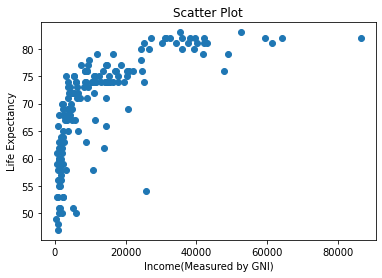

In [63]:
# Extract GNI and LifeExpectancy vector as numpy array
income = np.array(df_who['GNI'])
life_exp=np.array(df_who['LifeExpectancy'])
# Use the scatter plot to demonstrate the relationship
x = income
y = life_exp

plt.scatter(x,y)

plt.xlabel('Income(Measured by GNI)')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot')
plt.show()

According to the scatter plot, income level and life expectancy show a non-linear positive correlation. When income at a low level, life expectancy increase very fast as the income increase. When income reach to 20000, the spead of increase in life expectancy becomes very slow. After income reach to 20000, life expectancy barely grows anymore.


In [187]:
# Correlation between GNI and LifeExpectancy
df_corr = df_who[['GNI','LifeExpectancy']]
df_corr.corr()


,GNI,LifeExpectancy
GNI,1.000000,0.665786
LifeExpectancy,0.665786,1.000000



The correlation between income level and life expectancy is 0.665786, indicating there contains a positive correlation between income level and life expectancy. 

(a)Calculate the retention rate of day 1 and day 2, respectively.


In [188]:
# load the dataset into Python
df_retention = pd.read_csv('/Users/miyuxin/Downloads/Business Intelligence&Application/Problem Sets/PS1/Retention.csv')

# Browse the first few lines.
df_retention.head()

,user_id,play_duration,day
0,5295,3.706133,1
1,8357,5.591955,1
2,137,4.911135,1
3,8085,7.548870,1
4,5987,5.368567,1


In [196]:
# Construct a DataFrame for each day
df_1 = df_retention[df_retention['day']==1]

df_2 = df_retention[df_retention['day']==2]

df_3 = df_retention[df_retention['day']==3]

# Use left join to construct the data frame for the retention behaviors of the users who are active in day 1 and day2
df_ret_1 = pd.merge(df_1, df_2, on = ['user_id'], how = 'left')
df_ret_1.head()

,user_id,play_duration_x,day_x,play_duration_y,day_y
0,5295,3.706133,1,3.925121,2.0
1,8357,5.591955,1,7.096606,2.0
2,137,4.911135,1,NaN,NaN
3,8085,7.548870,1,6.593424,2.0
4,5987,5.368567,1,5.418421,2.0


In [210]:
Ret_d1 = df_ret_1.day_y.count()/df_ret_1.day_x.count()*100
print("(a) The retention rate of day1 is：%.2f%%"%Ret_d1)

(a) The retention rate of day1 is：44.57%


In [95]:
# Use left join to construct the data frame for the retention behaviors of the users active in days 2 and 3
df_ret_2 = pd.merge(df_2, df_3, on = ['user_id'], how = 'left')
df_ret_2.head()

,user_id,play_duration_x,day_x,play_duration_y,day_y
0,9083,3.825597,2,NaN,NaN
1,1550,4.942474,2,NaN,NaN
2,1131,5.749894,2,4.164616,3.0
3,3070,4.916593,2,5.706855,3.0
4,3928,4.997815,2,NaN,NaN


In [209]:
# Create dataframe for users active in both days 2 and 3.
Ret_d2 = df_ret_2.day_y.count()/df_ret_2.day_x.count()*100
print("(a) The retention rate of day2 is：%.2f%%"%Ret_d2)

(a) The retention rate of day2 is：47.71%


(b)Compare the retention rates of very active users and marginally active users in day 1 and day 2.

In [215]:
#The retention rate of very active users in day1
df_vact_1 = df_1[df_1['play_duration']>6]
df_vact_1.head()

,user_id,play_duration,day
3,8085,7.548870,1
7,3906,6.720527,1
23,1729,6.051341,1
30,622,6.124179,1
32,2593,6.754622,1


In [212]:
''' Use left join to construct the data frame for the retention behaviors of 
    the day1 very active users active in days 1 and 2'''
df_vac12 = pd.merge(df_vact_1, df_2, on = ['user_id'], how = 'left')
df_vac12.head()

,user_id,play_duration_x,day_x,play_duration_y,day_y
0,8085,7.548870,1,6.593424,2.0
1,3906,6.720527,1,4.587436,2.0
2,1729,6.051341,1,NaN,NaN
3,622,6.124179,1,NaN,NaN
4,2593,6.754622,1,NaN,NaN


In [214]:
Ret_vact1 = df_vac12.day_y.count()/df_vac12.day_x.count()*100
print("(b) The retention rate of very active users in day1 is: %.2f%%"%Ret_vact1)

(b) The retention rate of very active users in day1 is: 45.81%


In [216]:
#The retention rate of marginally active users in day1
df_marg_1 = df_1[df_1['play_duration']<=6]
df_marg_1.head()

,user_id,play_duration,day
0,5295,3.706133,1
1,8357,5.591955,1
2,137,4.911135,1
4,5987,5.368567,1
5,8015,4.352807,1


In [217]:
''' Use left join to construct the data frame for the retention behaviors of 
    the day1 marginally active users active in days 1 and 2'''
df_marg12 = pd.merge(df_marg_1, df_2, on = ['user_id'], how = 'left')
df_marg12.head()

,user_id,play_duration_x,day_x,play_duration_y,day_y
0,5295,3.706133,1,3.925121,2.0
1,8357,5.591955,1,7.096606,2.0
2,137,4.911135,1,NaN,NaN
3,5987,5.368567,1,5.418421,2.0
4,8015,4.352807,1,5.440249,2.0


In [218]:
Ret_marg1 = df_marg12.day_y.count()/df_marg12.day_x.count()*100
print("(b) The retention rate of marginally active users in day1 is: %.2f%%"%Ret_marg1)

(b) The retention rate of marginally active users in day1 is: 44.35%


In [219]:
#The retention rate of very active users in day2
df_vact_2 = df_2[df_2['play_duration']>6]
df_vact_2.head()

,user_id,play_duration,day
3227,6431,6.502348,2
3249,4763,7.334846,2
3253,1466,6.397406,2
3264,7952,6.113999,2
3269,956,6.782884,2


In [220]:
''' Use left join to construct the data frame for the retention behaviors of 
    the day1 very active users active in days 2 and 3'''
df_vact23 = pd.merge(df_vact_2, df_3, on = ['user_id'], how = 'left')
df_vact23.head()

,user_id,play_duration_x,day_x,play_duration_y,day_y
0,6431,6.502348,2,5.374795,3.0
1,4763,7.334846,2,NaN,NaN
2,1466,6.397406,2,5.290035,3.0
3,7952,6.113999,2,NaN,NaN
4,956,6.782884,2,NaN,NaN


In [222]:
Ret_vact2 = df_vact23.day_y.count()/df_vact23.day_x.count()*100
print("(b) The retention rate of very active users in day2 is: %.2f%%"%Ret_vact2)

(b) The retention rate of very active users in day2 is: 48.95%


In [223]:
#The retention rate of marginally active users in day2
df_marg_2= df_2[df_2['play_duration']<=6]
df_marg_2.head()

,user_id,play_duration,day
3215,9083,3.825597,2
3216,1550,4.942474,2
3217,1131,5.749894,2
3218,3070,4.916593,2
3219,3928,4.997815,2


In [224]:
''' Use left join to construct the data frame for the retention behaviors of 
    the day2 marginally active users active in days 2 and 3'''
df_marg23= pd.merge(df_marg_2, df_3, on = ['user_id'], how = 'left')
df_marg23.head()

,user_id,play_duration_x,day_x,play_duration_y,day_y
0,9083,3.825597,2,NaN,NaN
1,1550,4.942474,2,NaN,NaN
2,1131,5.749894,2,4.164616,3.0
3,3070,4.916593,2,5.706855,3.0
4,3928,4.997815,2,NaN,NaN


In [225]:
Ret_marg2 = df_marg23.day_y.count()/df_marg23.day_x.count()*100
print("(b) The retention rate of marginally active users in day2 is: %.2f%%"%Ret_marg2)

(b) The retention rate of marginally active users in day2 is: 47.54%
